In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
y_train[:7]

array([6, 9, 9, 4, 1, 1, 2], dtype=uint8)

In [8]:
y_train=y_train.reshape(-1,)
y_train[:7]

array([6, 9, 9, 4, 1, 1, 2], dtype=uint8)

array([[[164, 206,  84],
        [105, 140,  61],
        [118, 148, 101],
        ...,
        [109, 147,  73],
        [108, 147,  69],
        [ 91, 129,  57]],

       [[167, 213,  84],
        [116, 160,  49],
        [ 72, 109,  43],
        ...,
        [105, 142,  79],
        [105, 142,  72],
        [ 89, 127,  57]],

       [[140, 191,  65],
        [142, 193,  66],
        [119, 163,  79],
        ...,
        [104, 139,  84],
        [ 84, 120,  58],
        [ 78, 115,  49]],

       ...,

       [[139, 148,  81],
        [142, 155,  74],
        [135, 156,  72],
        ...,
        [ 89, 134,  28],
        [ 97, 148,  24],
        [126, 176,  49]],

       [[163, 157,  85],
        [153, 164,  82],
        [146, 164,  90],
        ...,
        [ 85, 130,  19],
        [ 98, 148,  27],
        [127, 178,  48]],

       [[183, 153, 102],
        [176, 182, 116],
        [154, 154, 100],
        ...,
        [ 94, 134,  29],
        [ 91, 133,  26],
        [122, 170,  44]]], dtype=uint8)
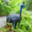

In [11]:
x_train[6]

In [10]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
classes[6]

'frog'

array([[[164, 206,  84],
        [105, 140,  61],
        [118, 148, 101],
        ...,
        [109, 147,  73],
        [108, 147,  69],
        [ 91, 129,  57]],

       [[167, 213,  84],
        [116, 160,  49],
        [ 72, 109,  43],
        ...,
        [105, 142,  79],
        [105, 142,  72],
        [ 89, 127,  57]],

       [[140, 191,  65],
        [142, 193,  66],
        [119, 163,  79],
        ...,
        [104, 139,  84],
        [ 84, 120,  58],
        [ 78, 115,  49]],

       ...,

       [[139, 148,  81],
        [142, 155,  74],
        [135, 156,  72],
        ...,
        [ 89, 134,  28],
        [ 97, 148,  24],
        [126, 176,  49]],

       [[163, 157,  85],
        [153, 164,  82],
        [146, 164,  90],
        ...,
        [ 85, 130,  19],
        [ 98, 148,  27],
        [127, 178,  48]],

       [[183, 153, 102],
        [176, 182, 116],
        [154, 154, 100],
        ...,
        [ 94, 134,  29],
        [ 91, 133,  26],
        [122, 170,  44]]], dtype=uint8)
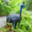

In [13]:
x_train[6]

In [14]:
y_train[6]

2

In [16]:
def plot_sample(x,y,index):
    plt.figure(figsize=(18,4))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

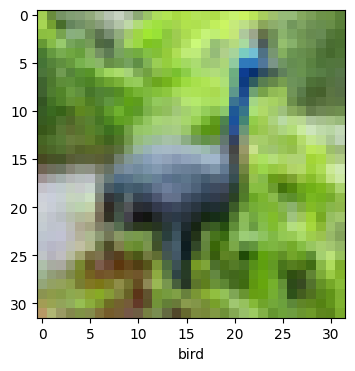

In [18]:
plot_sample(x_train,y_train,6)

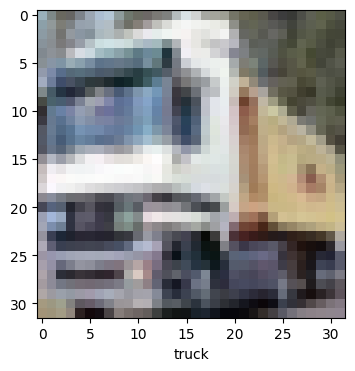

In [19]:
plot_sample(x_train,y_train,1)

In [20]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [21]:
x_train=x_train/255
x_test=x_test/255

In [23]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [26]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
cnn.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.6429 - loss: 1.0184
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.6890 - loss: 0.8949
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7158 - loss: 0.8139
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7460 - loss: 0.7375
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.7633 - loss: 0.6673
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.7803 - loss: 0.6223
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7955 - loss: 0.5781
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.8123 - loss: 0.5332
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.8276 - loss: 0.4908
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.8396 - loss: 0.4570
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.8479 - loss: 0.4243
Epoch 12

In [30]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7163 - loss: 1.0623


[1.0728076696395874, 0.7127000093460083]

In [32]:
y_test[:7]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1]], dtype=uint8)

In [33]:
y_test=y_test.reshape(-1,)
y_test[:7]

array([3, 8, 8, 0, 6, 6, 1], dtype=uint8)

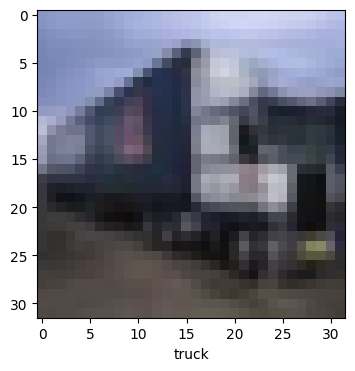

In [34]:
plot_sample(x_test,y_test,34)

In [35]:
y_pred=cnn.predict(x_test)
y_pred[:7]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


array([[2.51619313e-02, 1.16084459e-06, 6.25262633e-02, 5.56501031e-01,
        5.77637547e-06, 3.52045089e-01, 2.60653323e-03, 1.86023652e-04,
        9.63766885e-04, 2.49088362e-06],
       [3.10462274e-05, 1.56839960e-03, 4.93629582e-11, 2.73392316e-11,
        1.15181467e-11, 5.44278034e-12, 7.11119098e-12, 4.02817618e-13,
        9.98385966e-01, 1.44945107e-05],
       [2.38381401e-02, 3.35425069e-03, 2.24203934e-04, 9.73595234e-05,
        1.72482464e-06, 1.00909529e-05, 5.39659959e-05, 1.82786209e-06,
        9.44489062e-01, 2.79293880e-02],
       [7.86065996e-01, 1.40282873e-06, 1.92670137e-01, 3.26603738e-04,
        1.25443107e-02, 2.97921770e-06, 5.55128645e-06, 1.92209825e-07,
        8.38271622e-03, 1.39948497e-07],
       [1.96344544e-07, 1.00877162e-06, 7.45054102e-04, 7.48317689e-04,
        9.72888291e-01, 1.07833504e-04, 2.55017076e-02, 1.79344534e-06,
        5.67053576e-06, 7.71835005e-08],
       [6.51850787e-05, 2.17217403e-05, 2.79194042e-02, 2.51061358e-02,
   

In [36]:
np.argmax(y_pred[34])

9

In [37]:
y_pred_classes=[np.argmax(element) for element in y_pred]
y_pred_classes[:7]

[3, 8, 8, 0, 4, 6, 1]

In [38]:
y_test[:7]

array([3, 8, 8, 0, 6, 6, 1], dtype=uint8)